In [37]:
# These two lines allow for the notebook to automatically update to use the most
# up-to-date versions of the code being imported
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import modes as ms
from pyphotonicsims.components.elements import *

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Directional coupler
 - Coupling power
 $$\kappa = \sin{\frac{\pi \delta n L_c}{\lambda}}$$
 - Coupling rate for resonator
 $$\gamma_{ex} = \frac{c\log{1/(1-\kappa^2)}}{n_g L}$$

0.5 x 0.22 um, n_wg = 1.99, n_clad = [1.444023621703261]

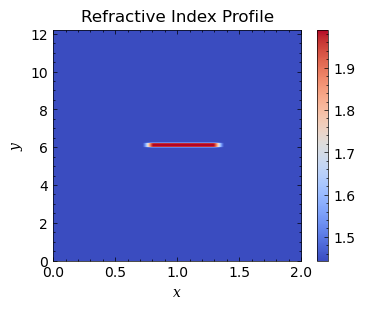

In [13]:
wg = ms.waveguide(x_step=0.1, y_step=0.02, thickness=0.22, width=0.5, slab_thickness=0, n_wg=1.99,
                 clad_thickness=[6], sub_thickness=6)
wg

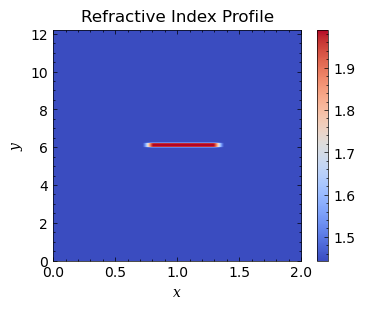

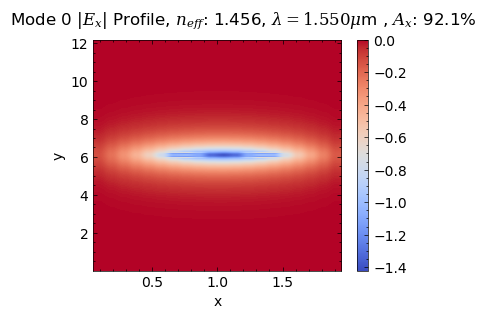

In [15]:
s = ms.mode_solver_full(wg = wg,
                        plot=True, plot_index=True, logscale=False, n_modes=1, fields_to_write=('Ex'))

[6, 6] x 0.08 um, n_wg = 1.936, n_clad = [1.444]

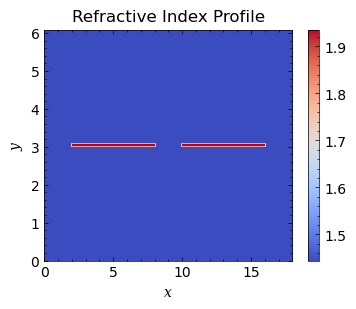

In [68]:
w_wg = np.array([6, 6])
t_wg = 0.08
t_clad = 2.0
gap = 2.0
n_SiO2 = 1.444
n_SiN = 1.936

coupler = ms.waveguide_array(widths=widths, wg_gaps=[gap],
                            x_step=0.1, y_step=0.01, thickness=thickness, n_wg=n_SiN, n_sub=n_SiO2, n_clads=[n_SiO2],
                 clad_thickness=[t_clad], sub_thickness=t_clad, sub_width = 18)
coupler

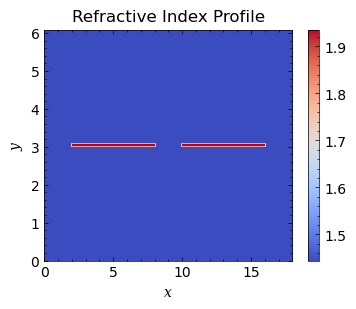

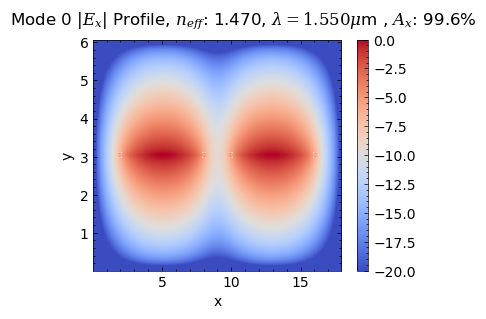

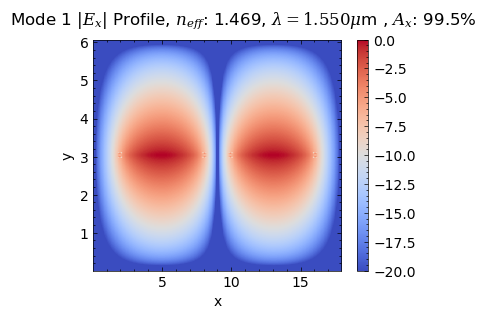

In [69]:
s = ms.mode_solver_full(wg = coupler, plot=True, plot_index=True, logscale=True, n_modes=2, fields_to_write=('Ex'))

[0.00019284]


(1.0, 1000.0)

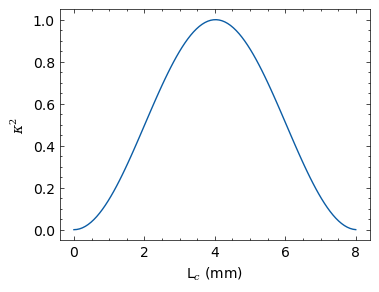

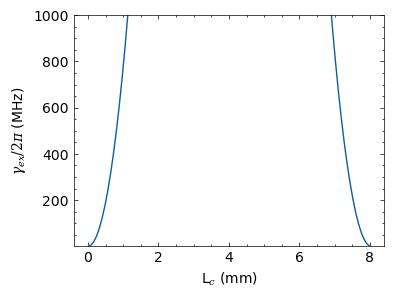

In [72]:
dneff = np.abs(np.diff(s.results['n_effs']))
print(dneff)

L = 2*np.pi*1e-3
ng = 1.53
wl = 1550e-9
Lc = np.linspace(0, 8e-3, 100)
ka2 = directional_coupler(dneff, Lc, wl)
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.plot(Lc*1e3, ka2)
plt.xlabel(r'L$_c$ (mm)')
plt.ylabel(r'$\kappa^2$')

plt.figure()
plt.plot(Lc*1e3, r_ex)
plt.xlabel(r'L$_c$ (mm)')
plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
plt.ylim((1, 1000))